# Exploratory Data Analysis on dataset Global Terrorism



reference by youtube classes

## 1. What this data set is all about?
1. Consists Information on more than 180,000 Terrorist Attacks.

2. Includes information on terrorist attacks around the world from 1970 to 2017.

3. Includes systematic data on domestic as well as international terrorist incidents that have occurred during specific time period. 

## 2. Installation of libraries and dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objects as go
import plotly.express as px


In [7]:
df = pd.read_csv('Terrorism.csv',encoding = 'latin')

In [9]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [10]:
# NUmber of rows and columns in data set
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 181691
Number of columns: 135


In [11]:
# Data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [12]:
# Statistical analysis
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

## 3. Data preperation and Cleaning

In [13]:
# Checking th null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [14]:
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# concatinating the columns killed and wounded
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.head(5)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     0.0      0.0             U.S. Embassy     NaN   
4     0.0      0.0           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  Casualty  
0     Unknown    NaN       1.0  
1     Unknown    NaN       0.0  
2     Unknown    NaN       1.0  
3  Explosives    NaN       0.0  
4  Incendiary    NaN       0.0

# 3. Basic Analysis by using visulisation

## 1.Which country has highest terrorirst attacks?

In [15]:
colors = ['lightslategray',] * 11
colors[0] = 'crimson'
x=df['Country'].value_counts().index
y=df['Country'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,text=y,
            textposition='auto'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Countries having terrorist attacks', xaxis_title="Countries",
    yaxis_title="Sum of occurences",)

## 2.Which region has highest terrorirst attacks?

In [16]:
colors = ['lightslategray',] * 13
colors[11] = 'dodgerblue'
x=df['Region'].value_counts().sort_values().index
y=df['Region'].value_counts().sort_values()
fig = go.Figure(data=[go.Bar(
    x=y.tolist(),
    y=x.tolist(),
    marker_color=colors,text=y,orientation='h',
            textposition='auto'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Regions having highest terrorist attacks', xaxis_title="Regions",
    yaxis_title="Sum of occurences",)

## 3.Which is the most weapon used by terrorirsts ?

In [17]:
df['Weapon_type'] = df['Weapon_type'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'],'Vehicles')
colors = ['lightslategray',] * 11
colors[0] = 'cyan'
x=df['Weapon_type'].value_counts().index
y=df['Weapon_type'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,text=y,
            textposition='auto'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Weapons used by terrorists', xaxis_title="Weapons",
    yaxis_title="Sum of occurences",)

## 4. Motive behind activities related to terrorism

In [18]:
df1 = df[df['Motive'].notna()]

In [19]:
df1['Motive']

5            To protest the Cairo Illinois Police Deparment
8               To protest the War in Vietnam and the draft
9               To protest the War in Vietnam and the draft
11                        Protest the draft and Vietnam War
14        To protest United States owned businesses in P...
                                ...                        
181663    The specific motive is unknown; however, sourc...
181665    The specific motive is unknown; however, sourc...
181672    The specific motive is unknown; however, sourc...
181682    The specific motive is unknown; however, sourc...
181683    The specific motive is unknown; however, sourc...
Name: Motive, Length: 50561, dtype: object

## 5. Number of terrorist activities occured in region with respect to year 

In [20]:
fig_bar = px.histogram(df, x="Region", y="Killed",
                 animation_frame="Year",
                 color_discrete_sequence=px.colors.qualitative.T10)
fig_bar.update_yaxes(showgrid=False),
fig_bar.update_xaxes(categoryorder='total descending')
fig_bar.update_traces(hovertemplate=None)
fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=45,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3045',
                        title_font=dict(size=25, color='#a6a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )
fig_bar.show()

## 6. Number of Terrorist activities vs Year

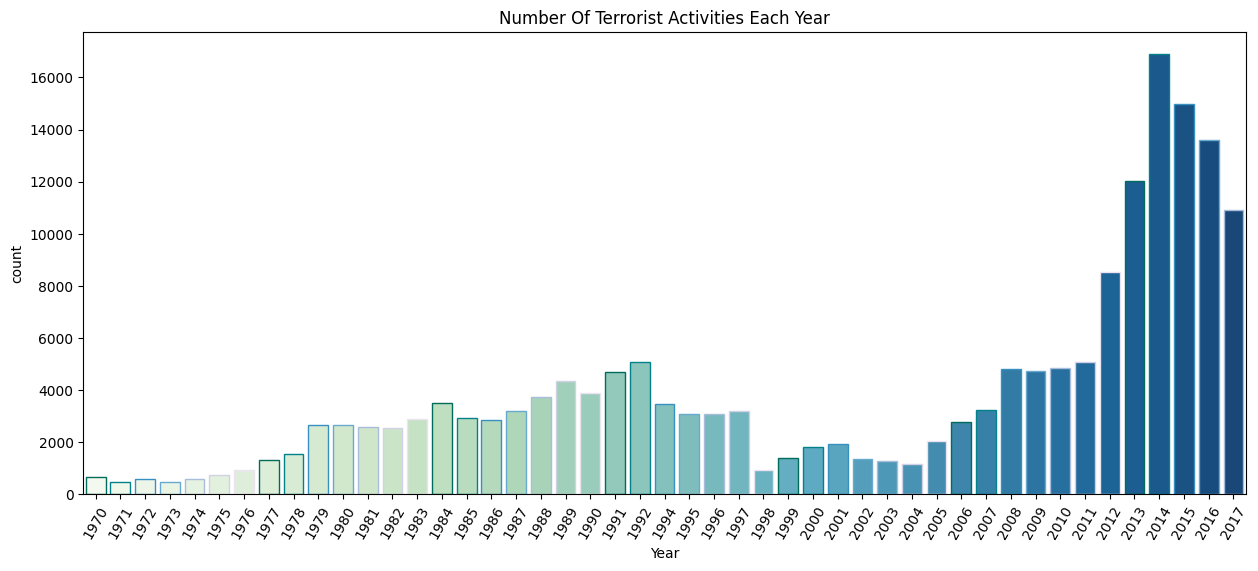

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=df,palette='GnBu',edgecolor=sns.color_palette('PuBuGn_r',7))
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [22]:
df['Killed'].sum()

411868.0

## 7. Who are the main targets?

In [23]:
colors = ['lightslategray',] * 22
colors[0] = 'cyan'
x=df['Target_type'].value_counts().index
y=df['Target_type'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Main Targets', xaxis_title="Targets",
    yaxis_title="Sum of occurences",)

## 8. What are the attacking methods used?

In [ ]:
colors = ['lightslategray',] * 22
colors[0] = 'darkblue'
x=df['AttackType'].value_counts().index
y=df['AttackType'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Main Targets', xaxis_title="Targets",
    yaxis_title="Sum of occurences",)

## 9 . Attacks vs Killed

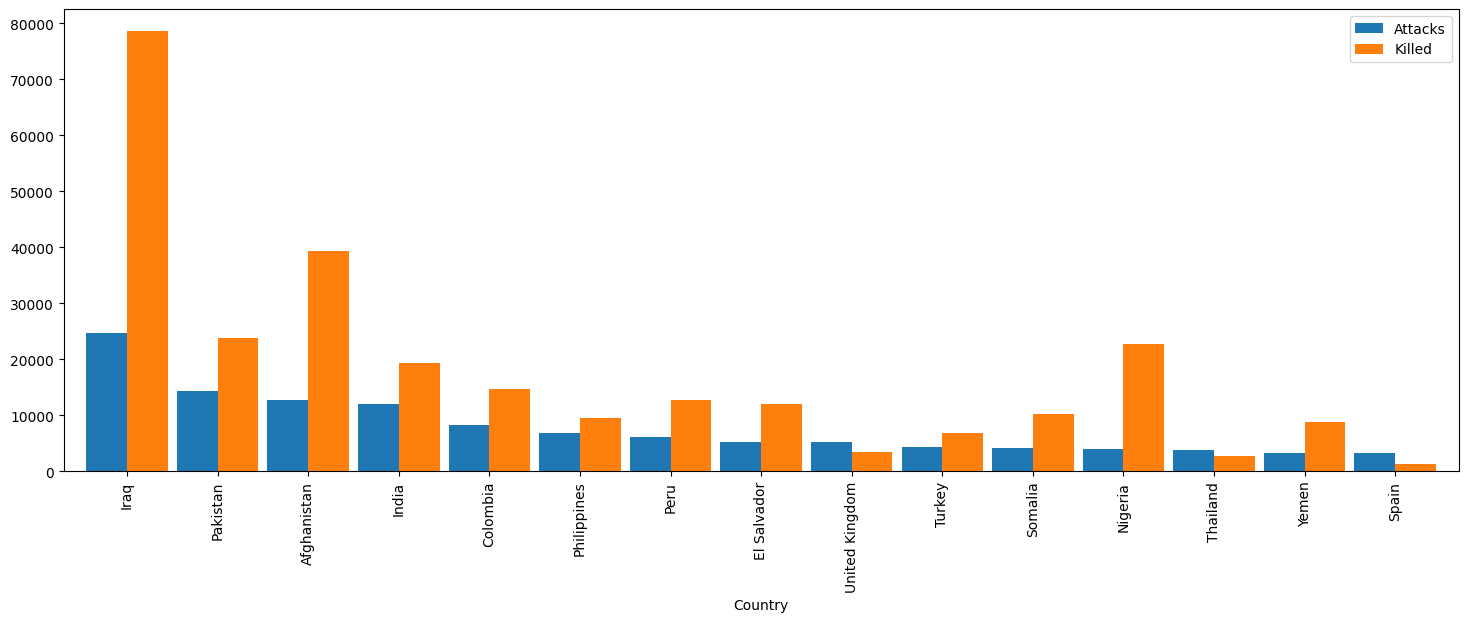

In [ ]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## 10. Most Notorious Groups

In [ ]:
colors = ['lightslategray',] * 22
colors[13] = 'darkblue'
x=df['Group'].value_counts()[1:15].sort_values().values
y=df['Group'].value_counts()[1:15].sort_values().index
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors,orientation='h'  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Main Targets', xaxis_title="Targets",
    yaxis_title="Sum of occurences",)

## 11. Activity of Top Terrorist Groups

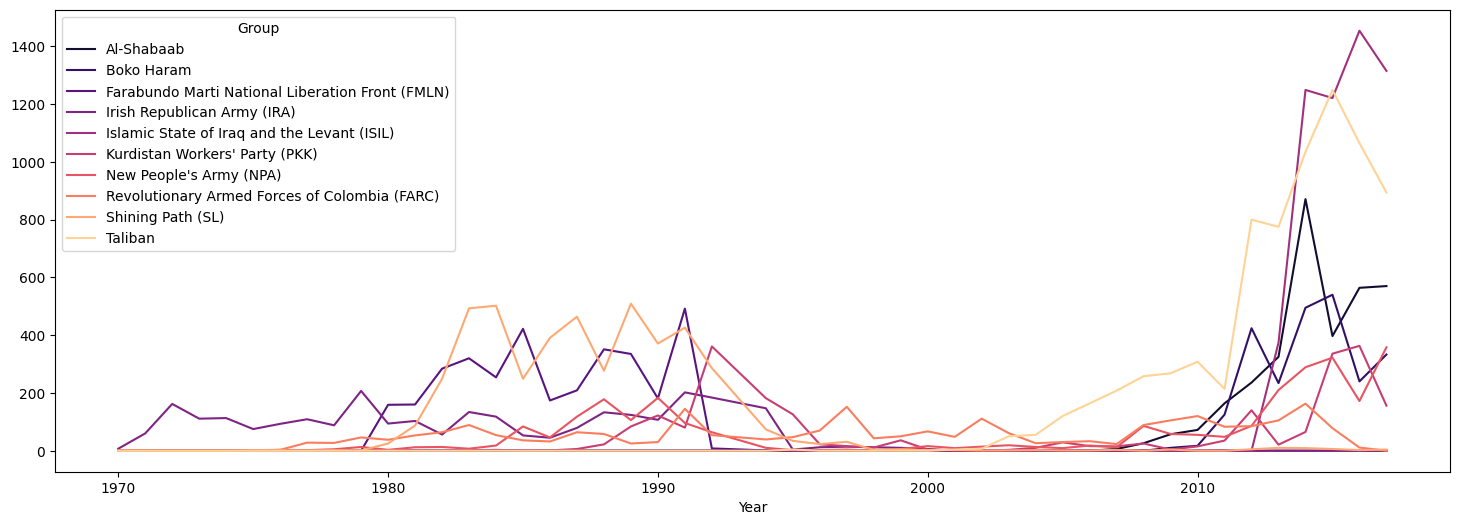

In [ ]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Conclusion

To conclude, we have seen various types of analysis and question and answers with the data set I found interesting. Here is something I feel worth to share. We just look at data set all we can say is that we just know what are the columns and what it contains.So Exploratory Data Analysis is a very efficient way to make our work easy. With python libraries like pandas, numpy, matplotlib, seaborn,plotly allow us to come to conclusions calculating and vizualization.

From the above analysis we conclude that
* Iraq country has highest number of attacks (24636)
* Middle and East Africa region has highest number of attacks (50474)
* Explosives are the most weapon used by terrorsits (92426).
* From the analysis we can see that on 2014 the number of terrorist activities were the highest in Iraq Country (16806)
* Private citizens and Property were the main targets in terrorism activity (43510)
* Bombing and Explosion methods were most commonly used in terrorism activity (82255).
* Taliban is most Notorious group with highest number of terrorist activitiies (7478)
